In [1]:
from pathlib import Path

npy_dir = Path('../output/sed_result/0110_121231/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
framewise_output = np.load(npy_dir / '003bec244-14.npy')
framewise_output.shape

(2400, 24)

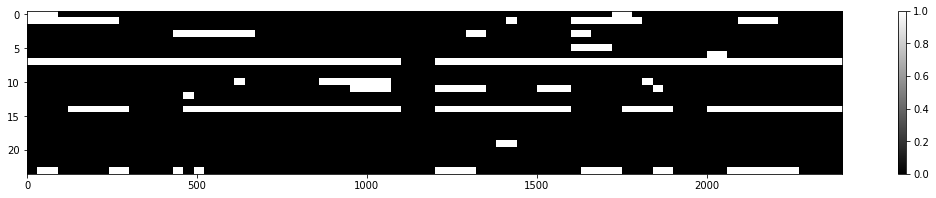

In [49]:
threshold = 0.9
thresholded = (framewise_output > threshold) * 1
plt.figure(figsize=(20,3))
plt.imshow(thresholded.T, aspect=20, cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
for target_idx in range(thresholded.shape[1]):
    if thresholded[:, target_idx].mean() == 0:
        pass
    else:
        detected = np.argwhere(thresholded[:, target_idx]).reshape(-1)
        head_idx = 0
        tail_idx = 0
        while True:
            if (tail_idx + 1 == len(detected)) or (
                    detected[tail_idx + 1] - 
                    detected[tail_idx] != 1):
                onset = 0.01 * detected[
                    head_idx] + global_time
                offset = 0.01 * detected[
                    tail_idx] + global_time
                onset_idx = detected[head_idx]
                offset_idx = detected[tail_idx]
                max_confidence = framewise_outputs[
                    onset_idx:offset_idx, target_idx].max()
                mean_confidence = framewise_outputs[
                    onset_idx:offset_idx, target_idx].mean()
                estimated_event = {
                    "site": site,
                    "audio_id": audio_id,
                    "ebird_code": INV_BIRD_CODE[target_idx],
                    "onset": onset,
                    "offset": offset,
                    "max_confidence": max_confidence,
                    "mean_confidence": mean_confidence
                }
                estimated_event_list.append(estimated_event)
                head_idx = tail_idx + 1
                tail_idx = tail_idx + 1
                if head_idx >= len(detected):
                    break
            else:
                tail_idx += 1
    global_time += PERIOD